Exploratory Data Analysis

Importing important libraries

In [ ]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading the CSv file

In [ ]:
df1 = pd.read_csv('/content/train.csv')

Findinf the size of the dataset

In [ ]:
print(df1.shape)

(1460, 81)


Printing top 5 Rows

In [ ]:
df1.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Printing Last 5 rows

In [ ]:
df1.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Finding Numerical Variables

In [ ]:
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df1[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Finding Temporal Variables(Year columns)

In [ ]:
year_feature = [feature for feature in numerical_features  if 'Yr' in feature or 'Year'in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Finding Unique Year in each column

In [ ]:
for feature in year_feature:
  print(feature,df1[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Plot of YrSold and our output feature that is SalePrice

<Axes: xlabel='YrSold'>

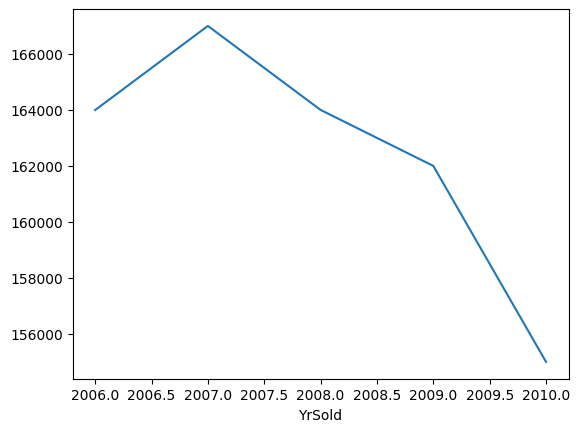

In [ ]:
df1.groupby('YrSold')['SalePrice'].median().plot()

Here we will compare the difference between All years feature with SalePrice

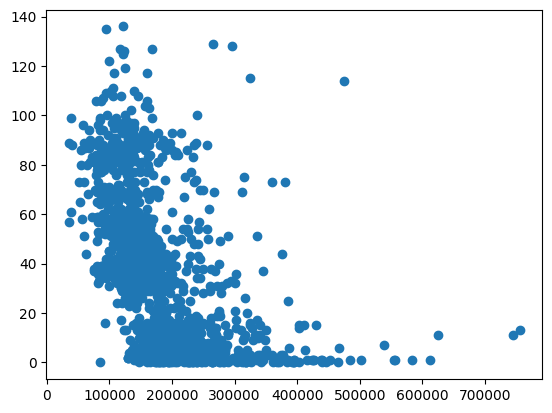

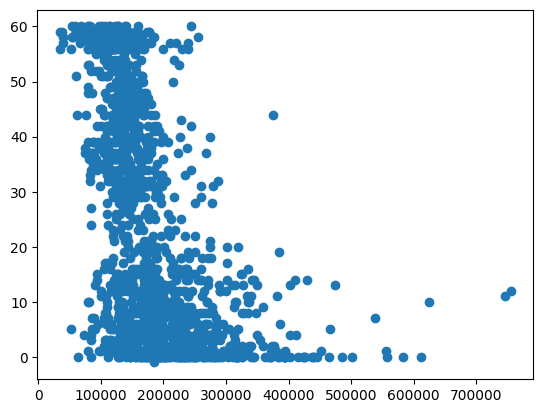

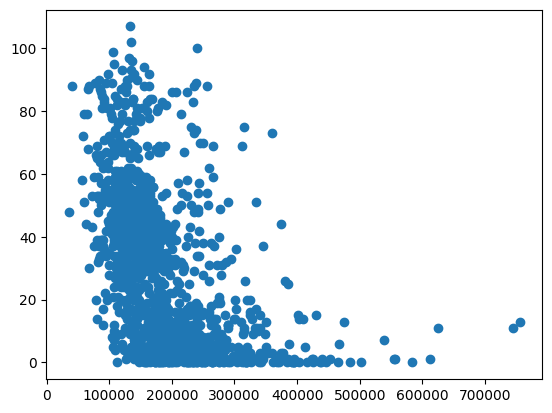

In [ ]:
for feature in year_feature:
  if feature!= 'YrSold':
    data=df1.copy()
    data[feature]=data['YrSold']-data[feature]
    plt.scatter(data['SalePrice'],data[feature])
    plt.show()

Finding Discrete Numerical Variables

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(df1[feature].unique())<25 and feature not in year_feature+['Id']]
print(discrete_feature)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [ ]:
df1[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


Realtionship between dicrete features and Sale PRice

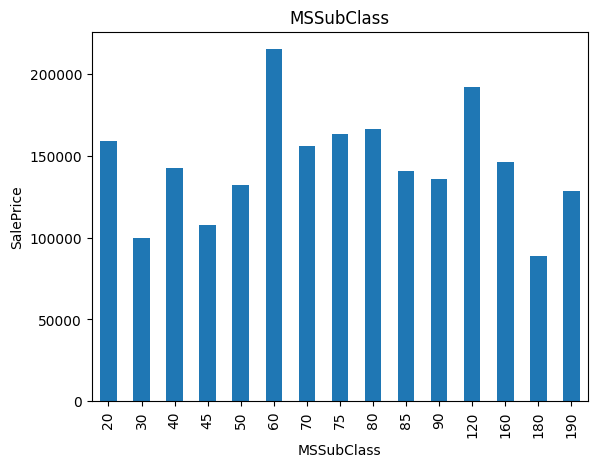

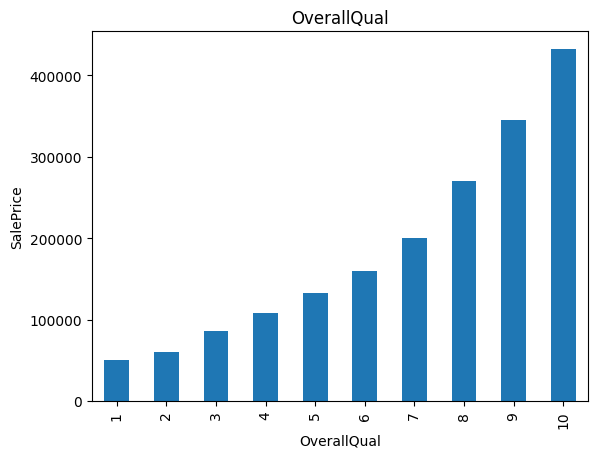

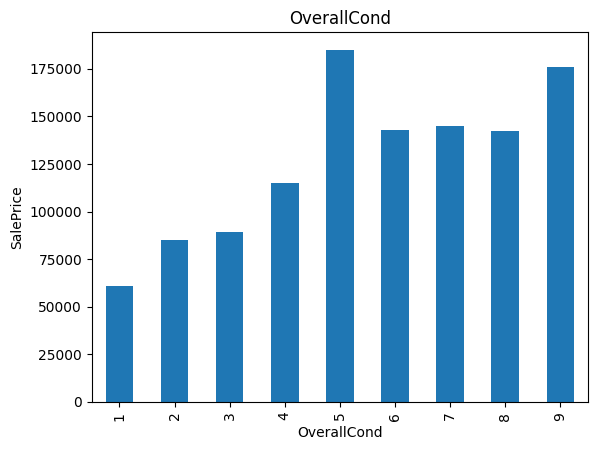

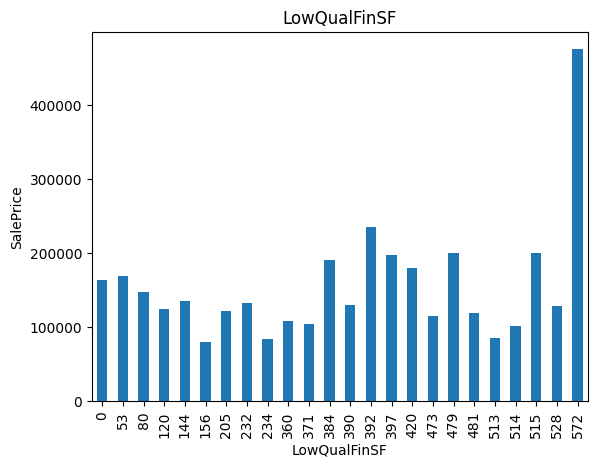

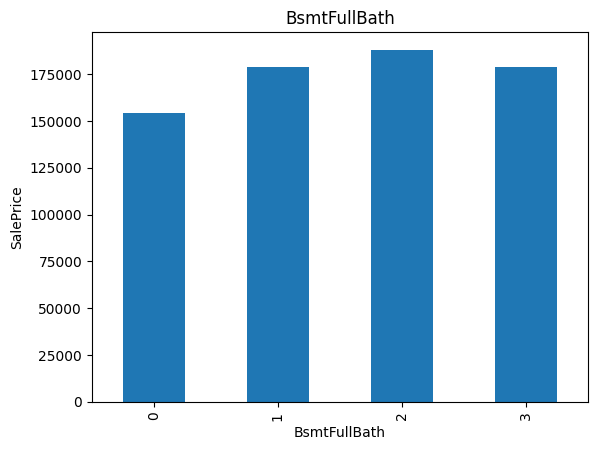

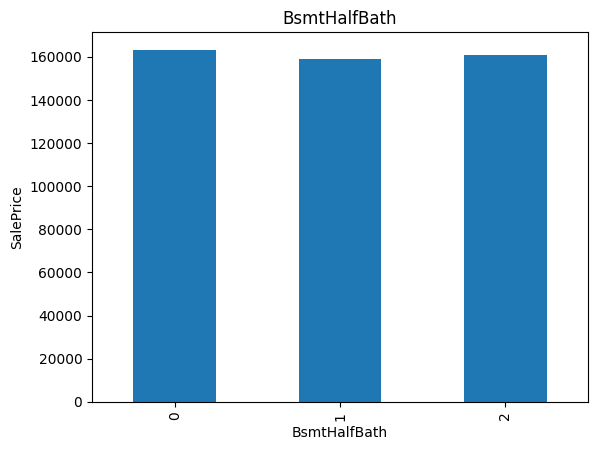

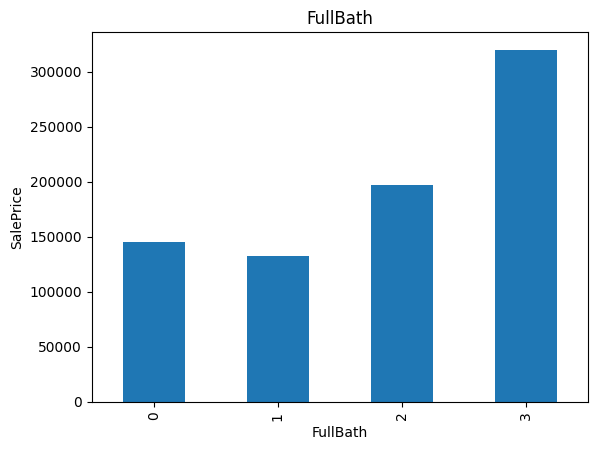

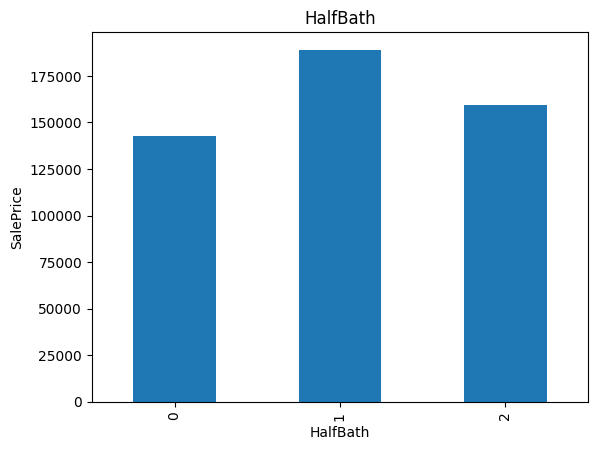

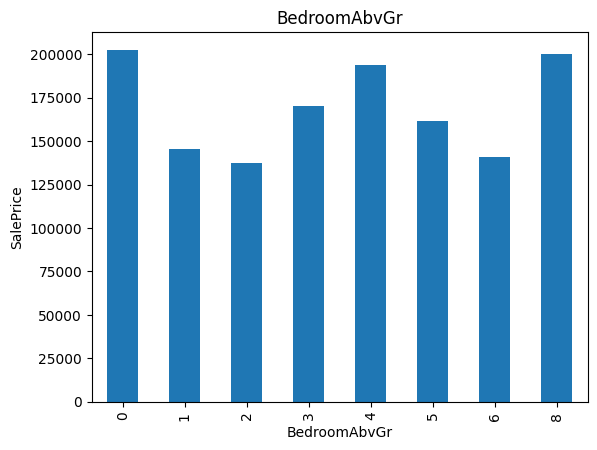

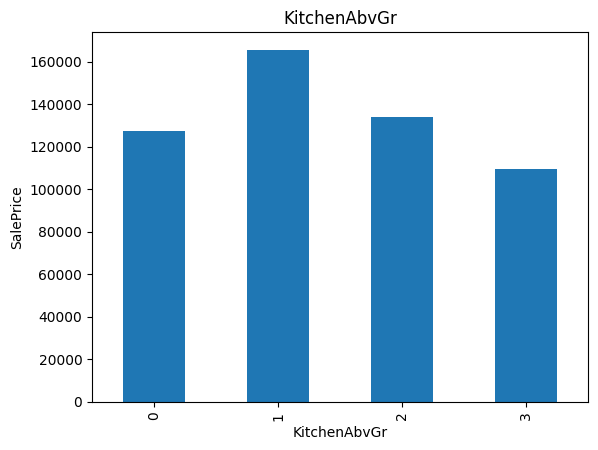

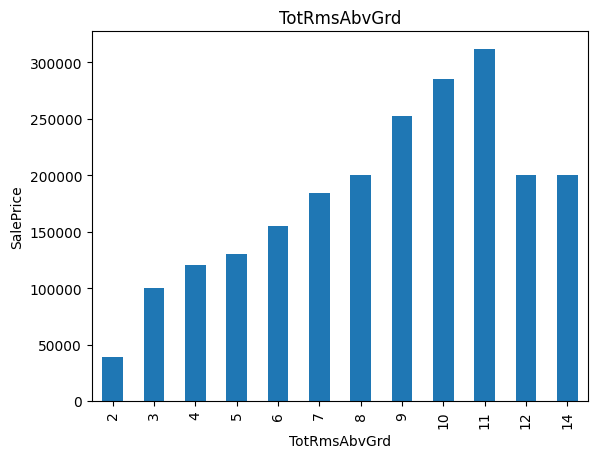

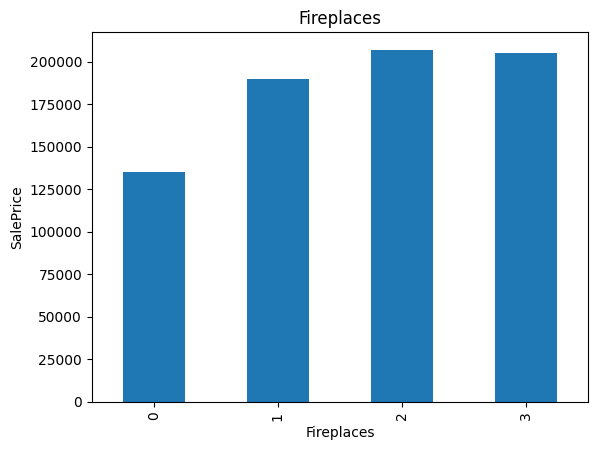

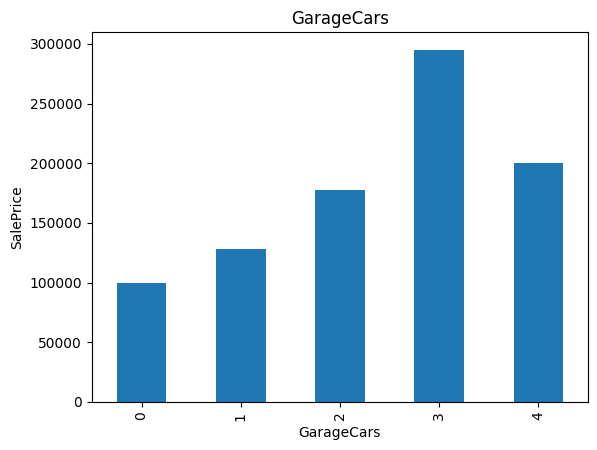

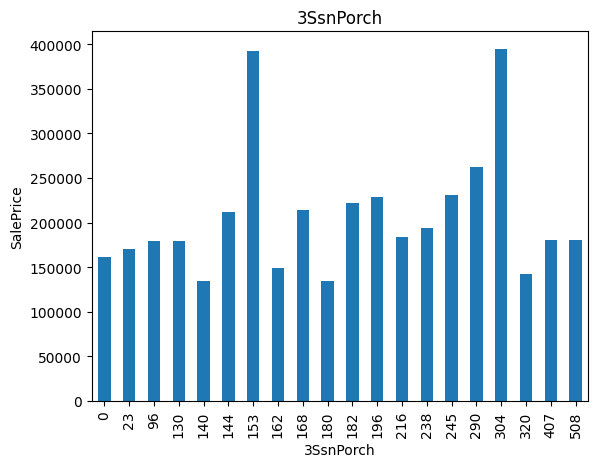

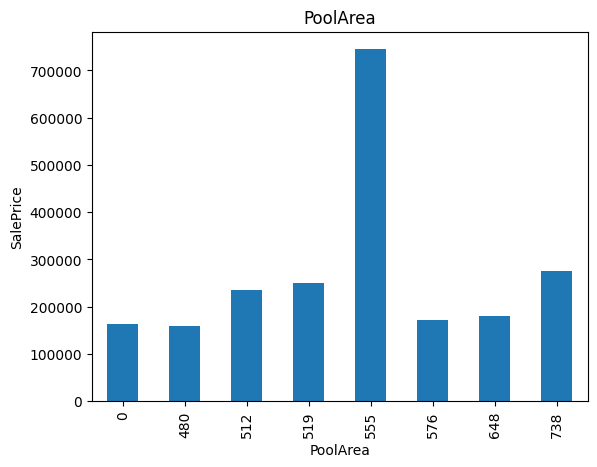

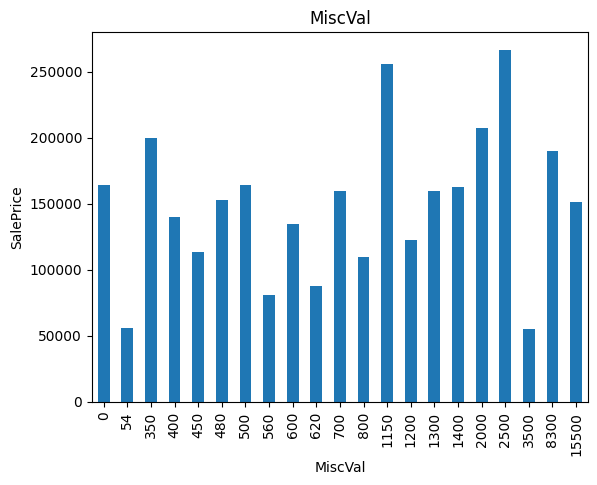

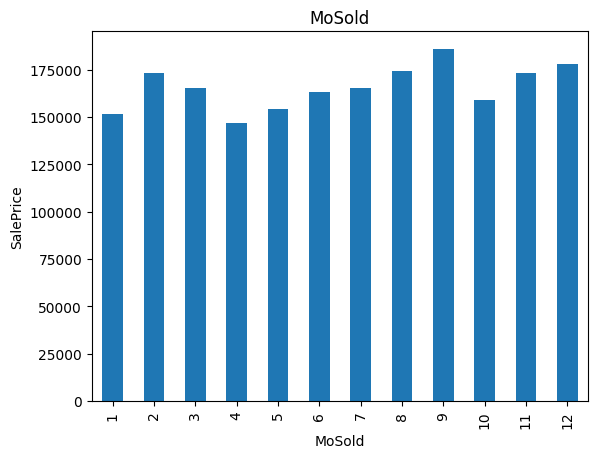

In [ ]:
for feature in discrete_feature:
  data=df1.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

Finding Continuous Numerical Features

In [ ]:
conti_feature=[feature for feature in numerical_features if feature not in discrete_feature+ year_feature+['Id']]
conti_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

Analyse the continuous values by creating histograms to understand the distribution


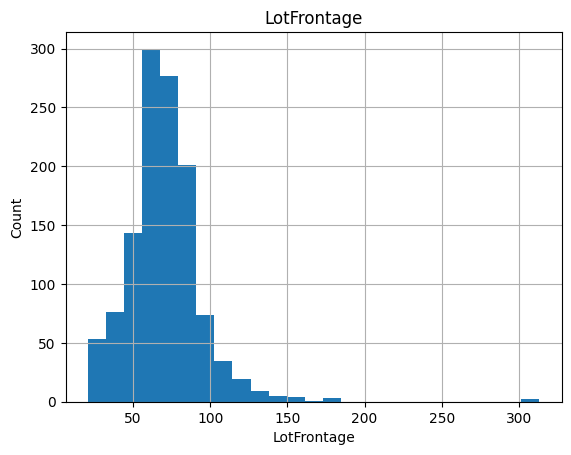

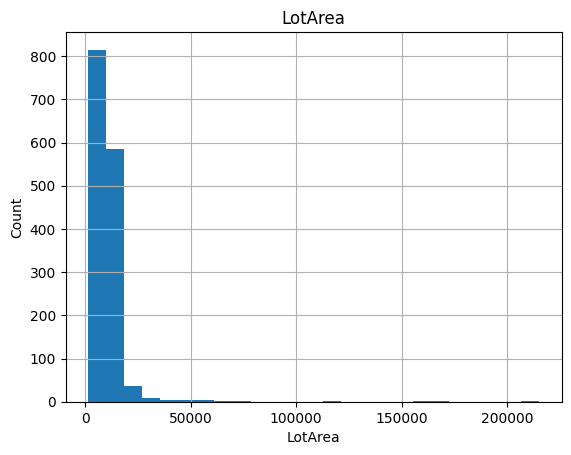

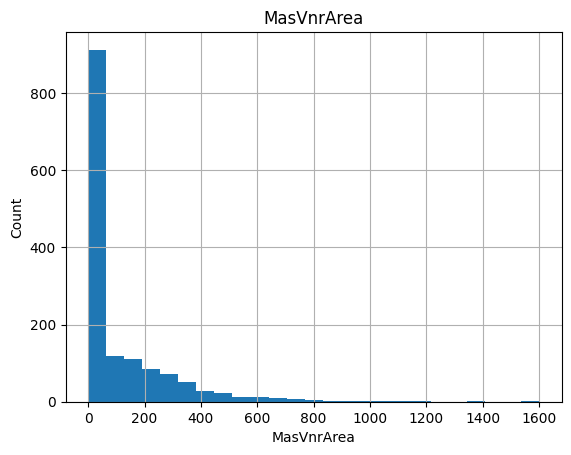

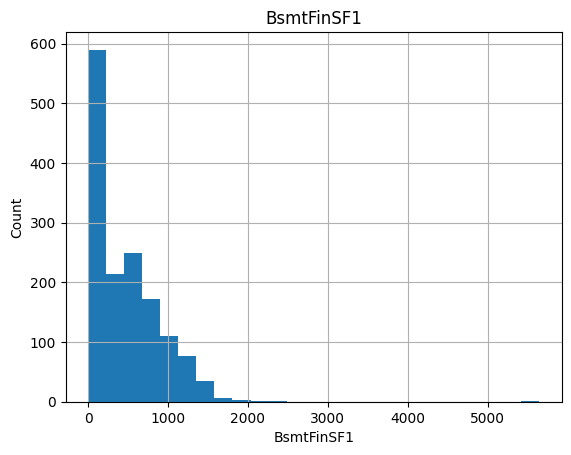

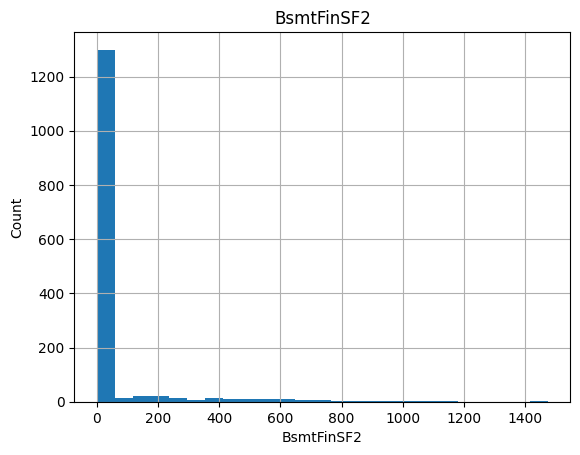

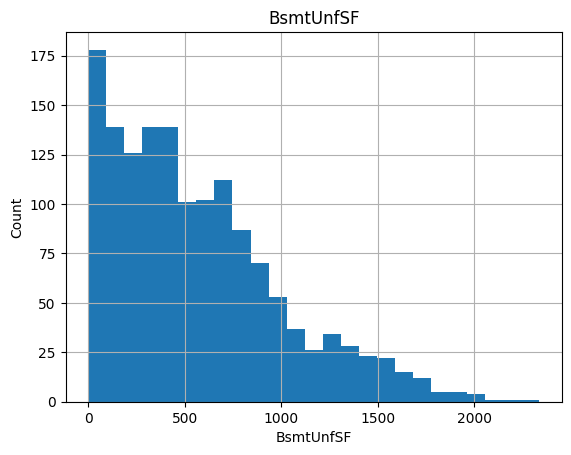

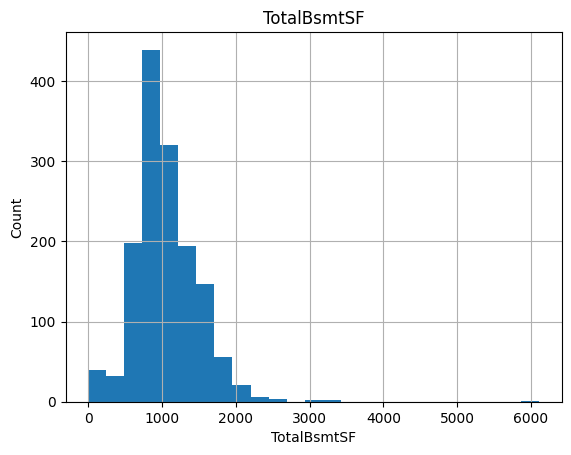

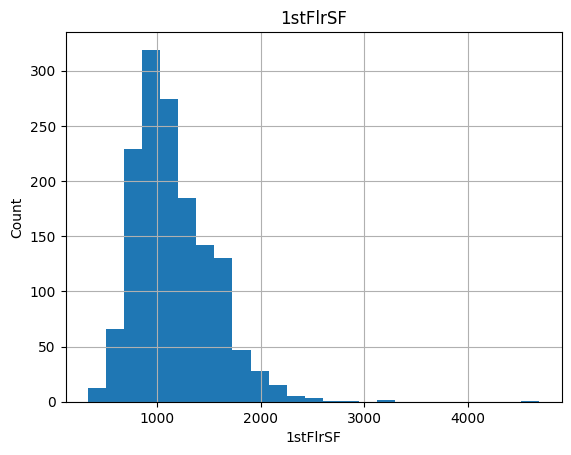

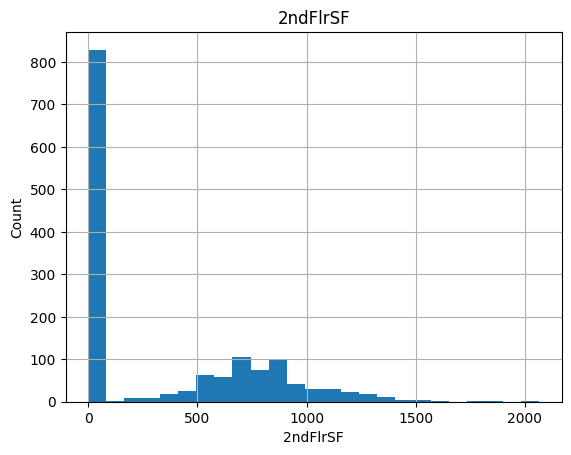

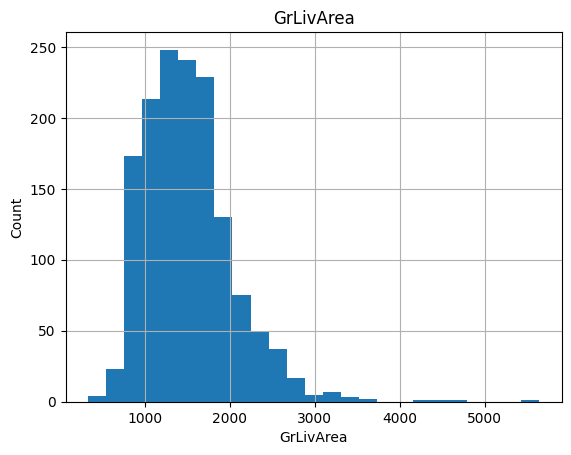

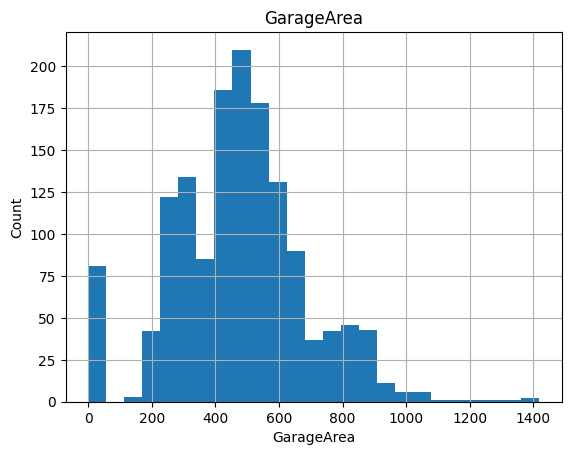

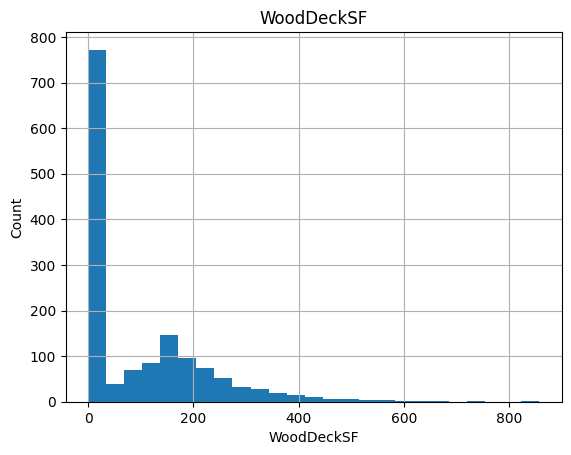

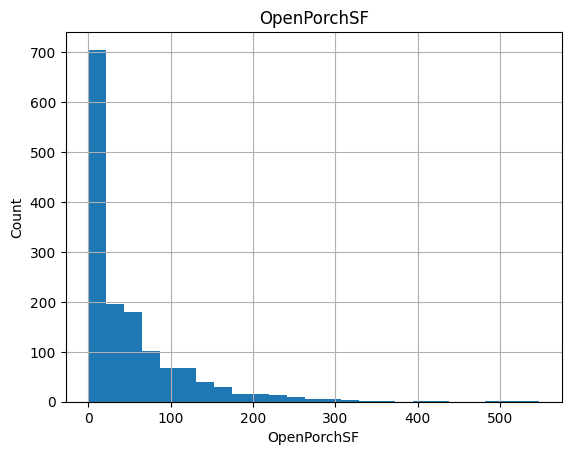

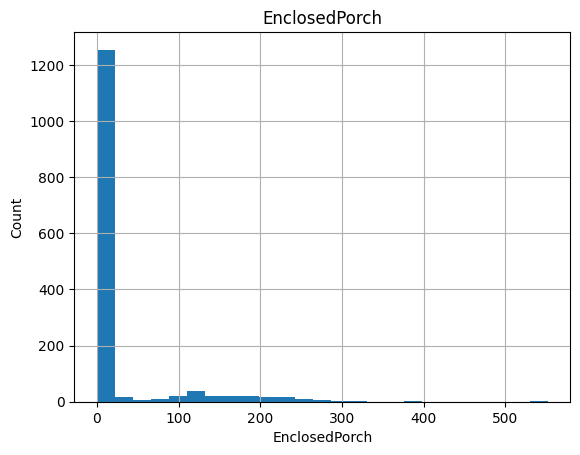

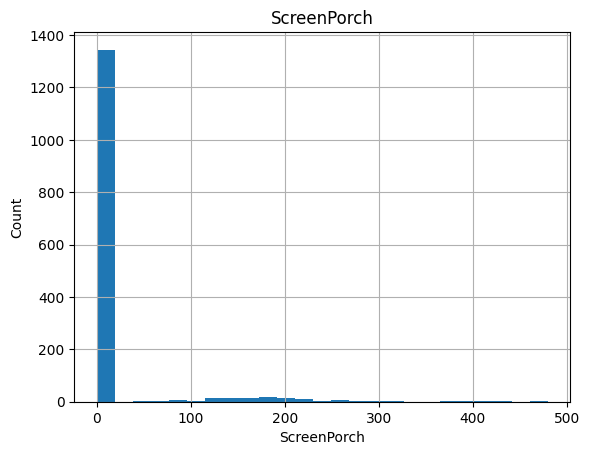

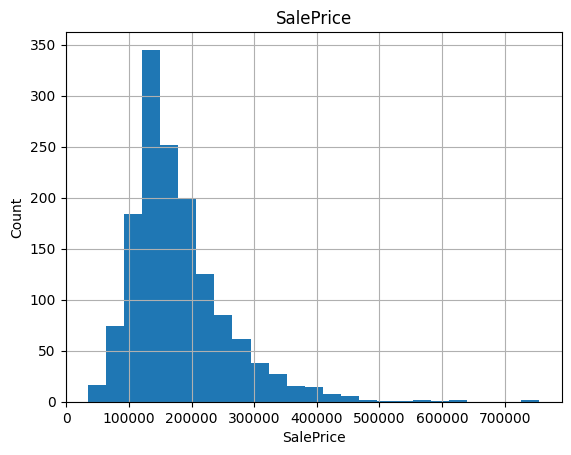

In [ ]:
for feature in conti_feature:
  data=df1.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

Using logarithmic transformation and finding Relationship between continuous features and our output feature that is SalePrice

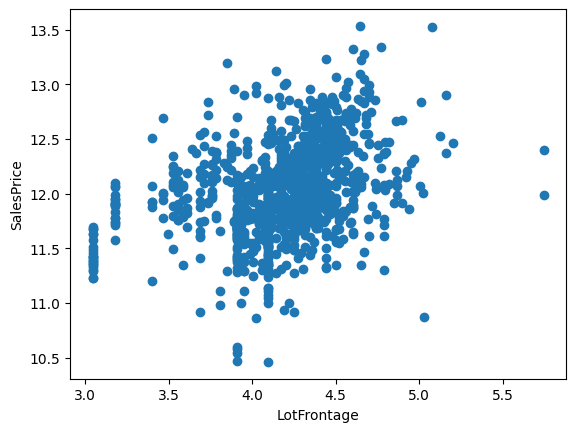

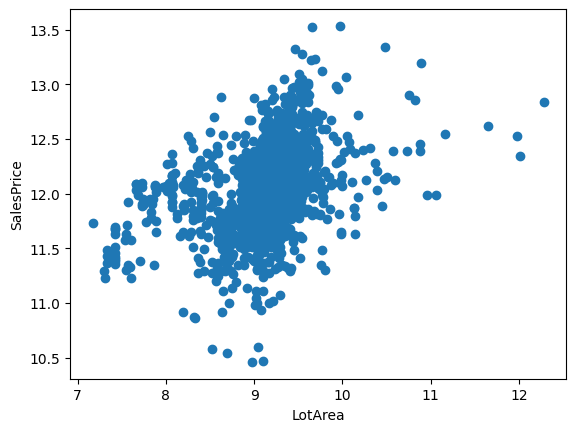

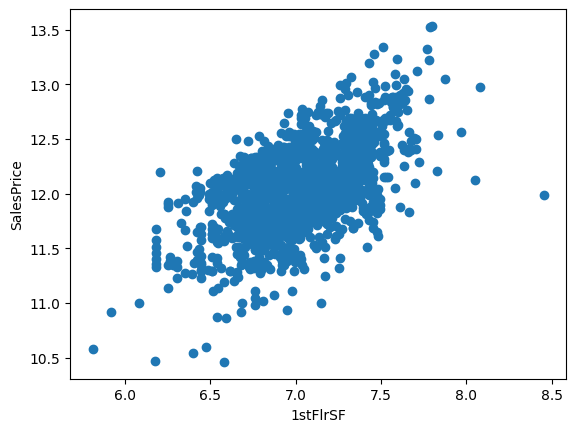

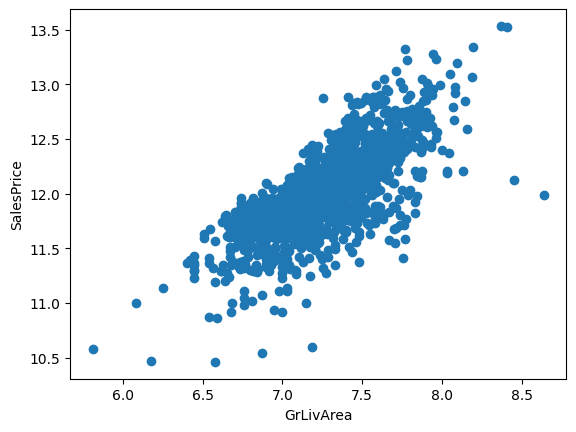

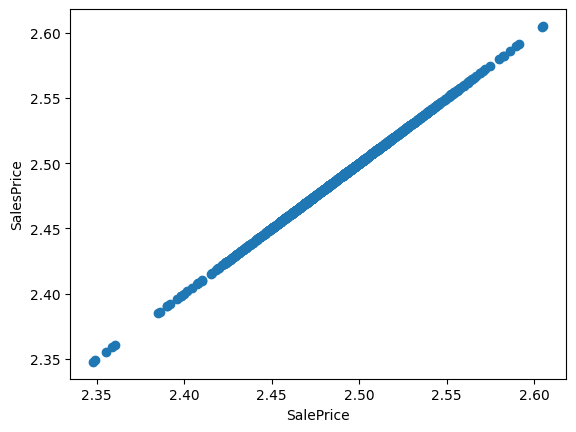

In [ ]:
for feature in conti_feature:
  data=df1.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.show()



Finding outliers for Continuous features

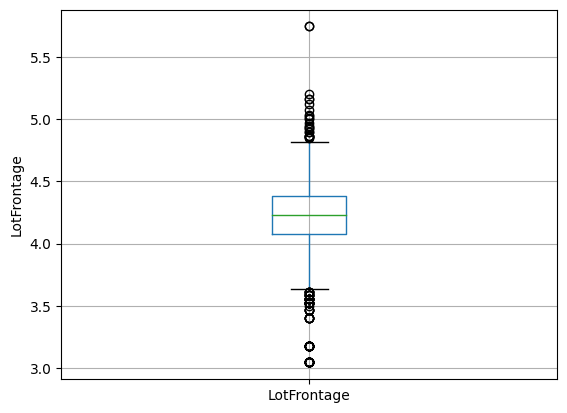

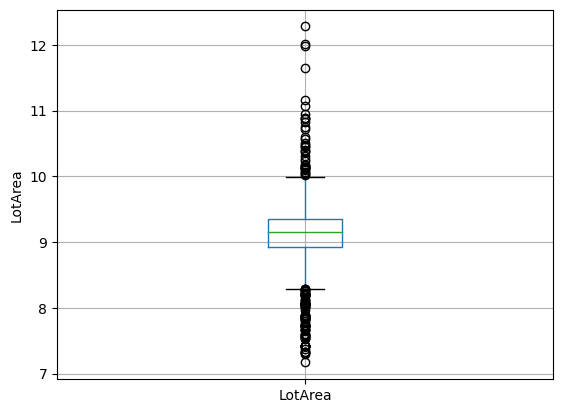

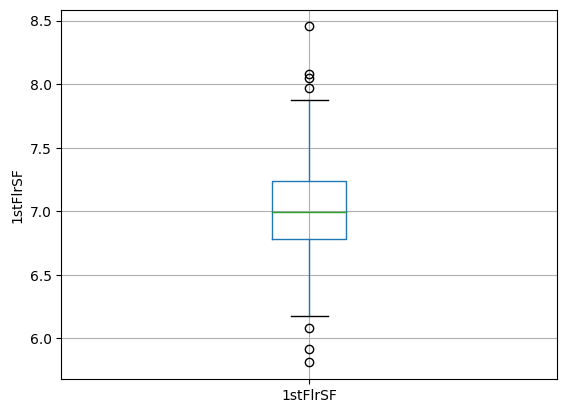

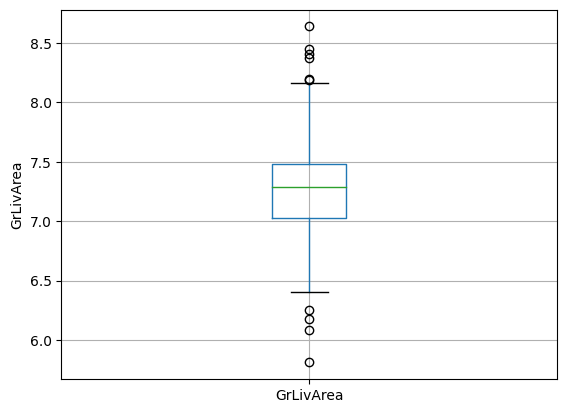

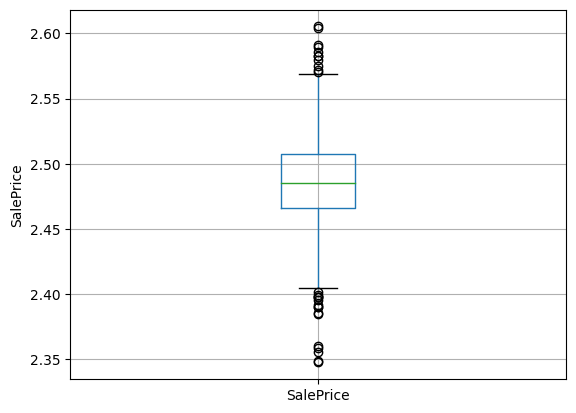

In [ ]:
for feature in conti_feature:
  data=df1.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

Finding Categorical features

In [ ]:
categorical_features=[f for f in df1.columns if df1[f].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
df1[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Finding types of unique category of each categorical feature

In [ ]:
for f in categorical_features:
  print('the feature is {} and categories are {}'.format (f,df1[f].unique()))

the feature is MSZoning and categories are ['RL' 'RM' 'C (all)' 'FV' 'RH']
the feature is Street and categories are ['Pave' 'Grvl']
the feature is Alley and categories are [nan 'Grvl' 'Pave']
the feature is LotShape and categories are ['Reg' 'IR1' 'IR2' 'IR3']
the feature is LandContour and categories are ['Lvl' 'Bnk' 'Low' 'HLS']
the feature is Utilities and categories are ['AllPub' 'NoSeWa']
the feature is LotConfig and categories are ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
the feature is LandSlope and categories are ['Gtl' 'Mod' 'Sev']
the feature is Neighborhood and categories are ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
the feature is Condition1 and categories are ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
the feature is Condition2 and categories are ['

How to find for a Particular Column

In [ ]:
x=df1['Neighborhood'].unique()
x

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

Finding Number of differet categories for a particular categorical feature

In [ ]:
len(x)

25

Realtion between Categorical features and our output feature

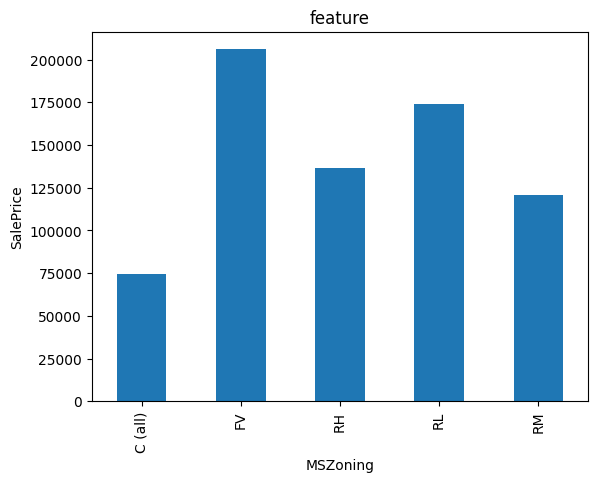

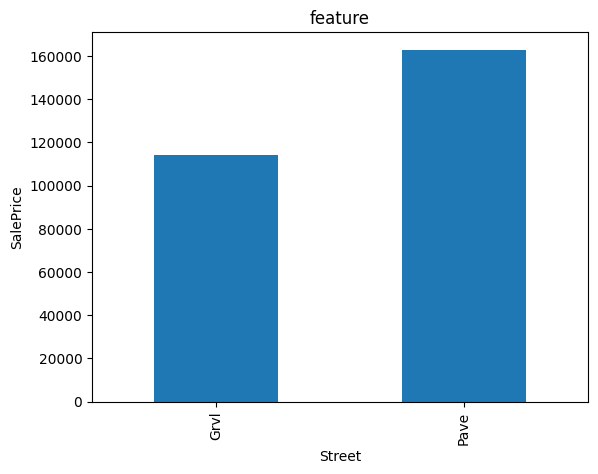

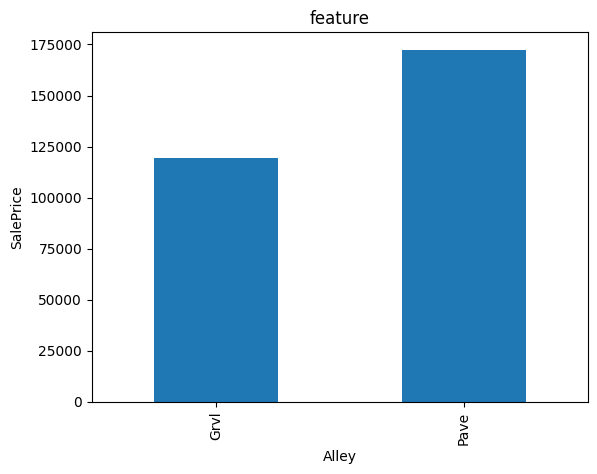

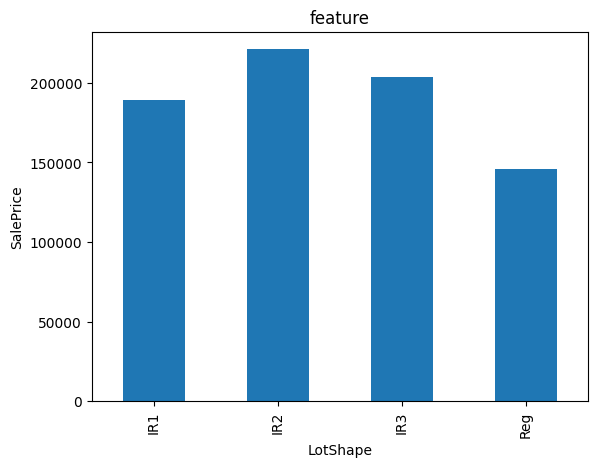

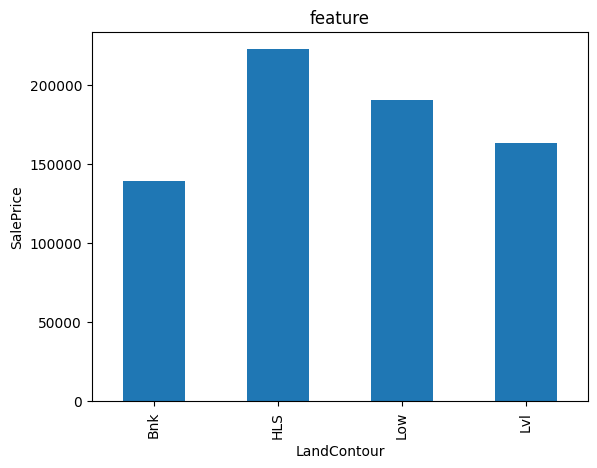

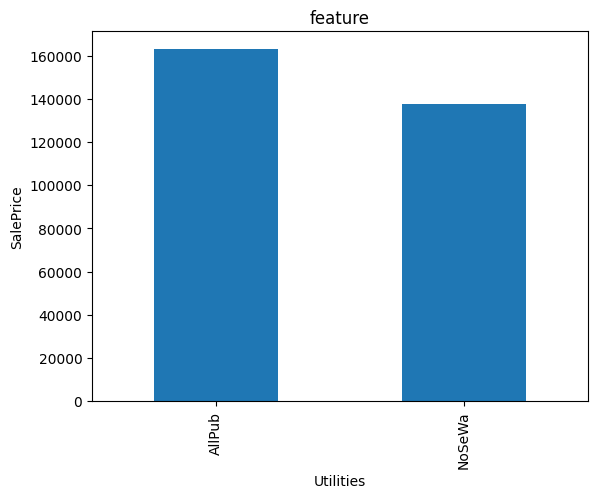

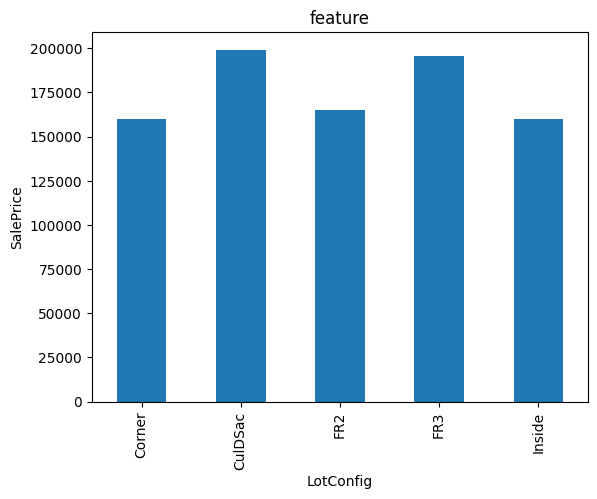

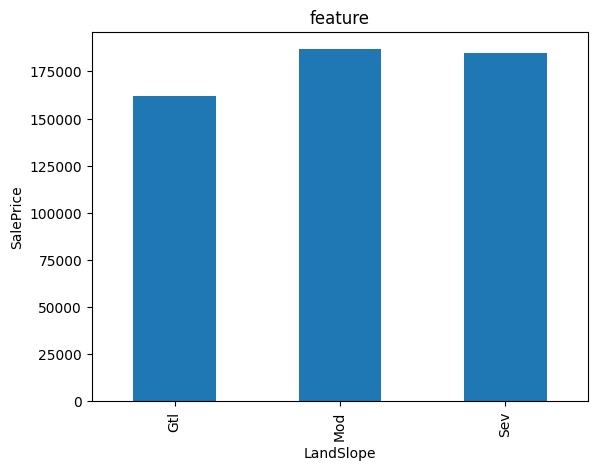

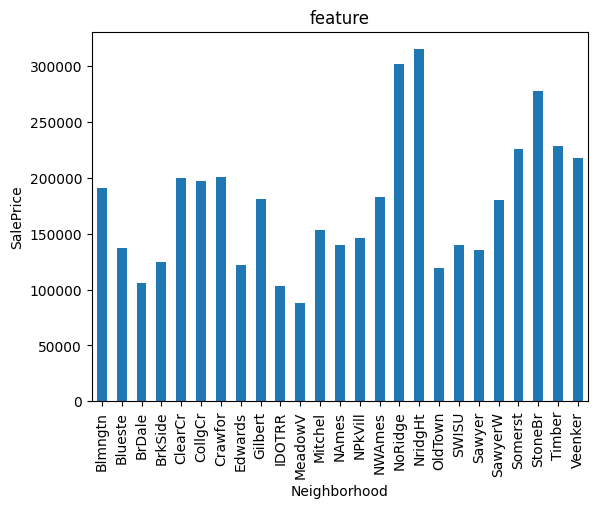

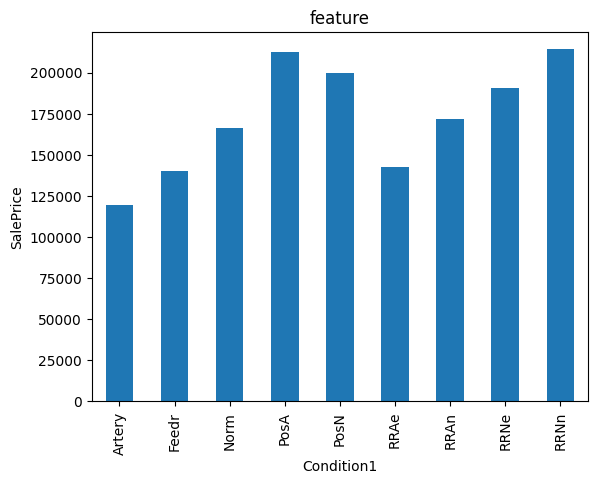

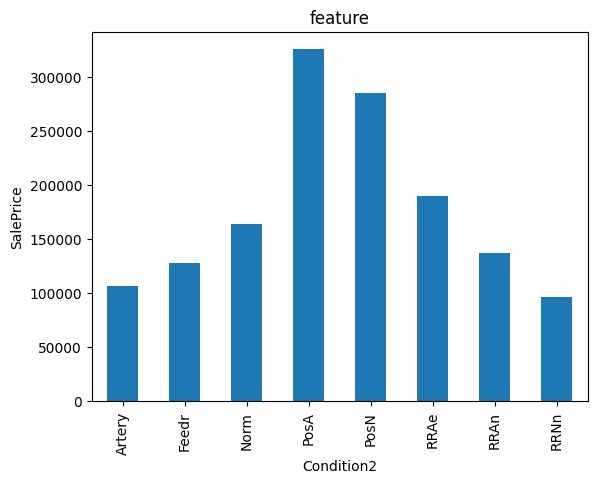

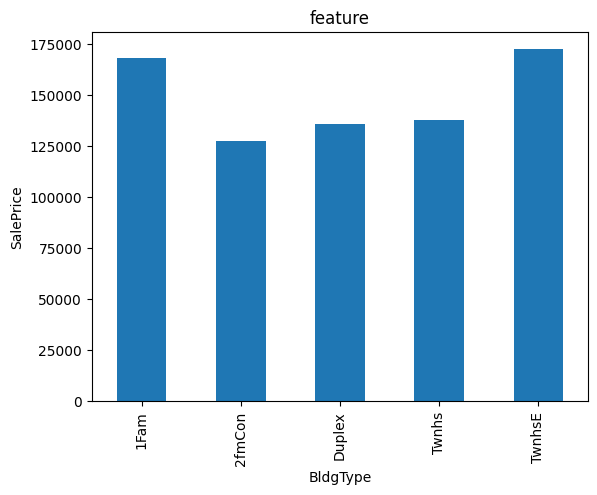

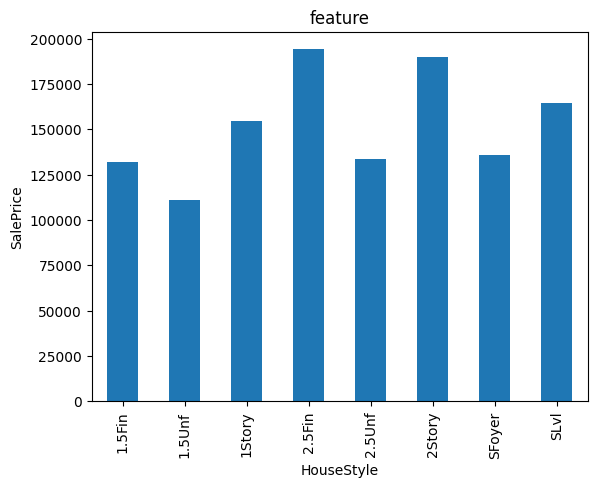

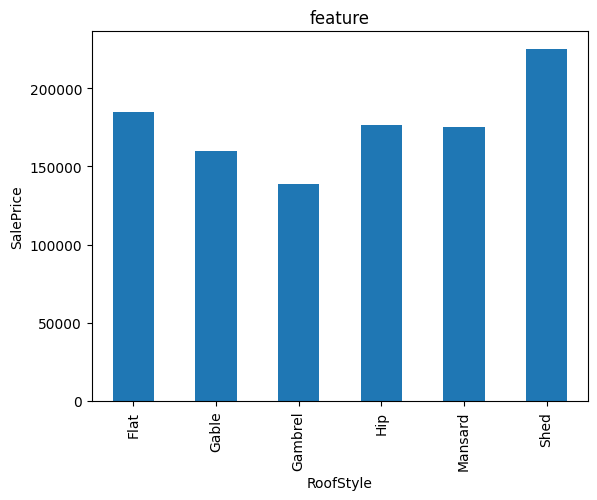

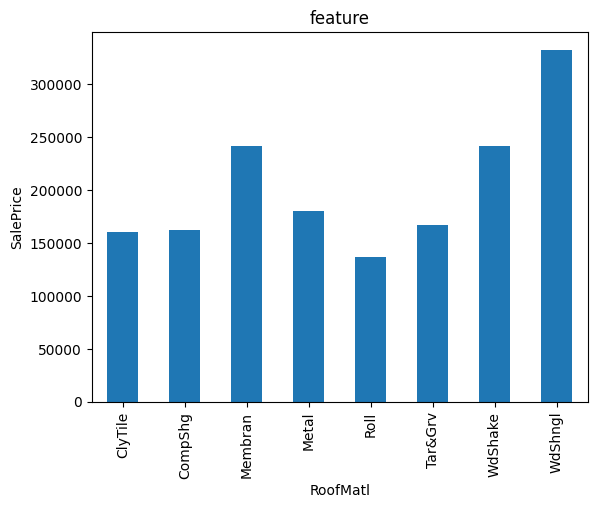

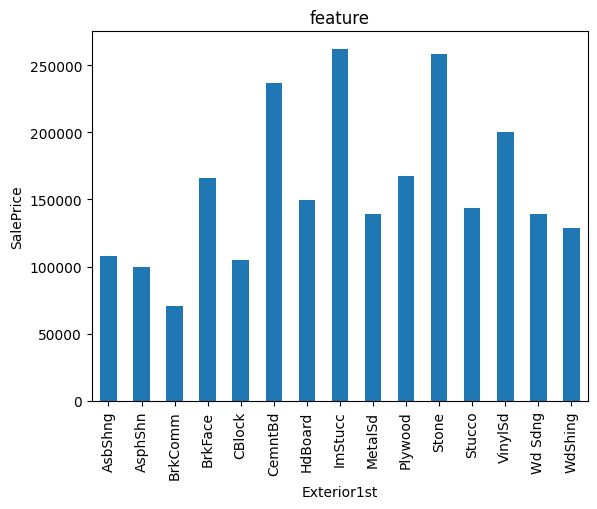

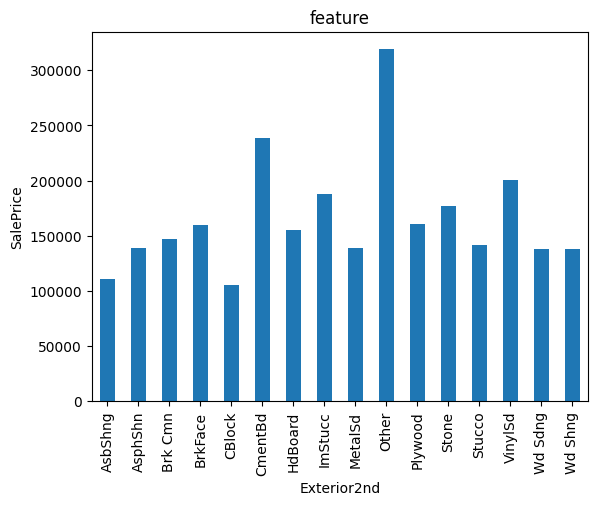

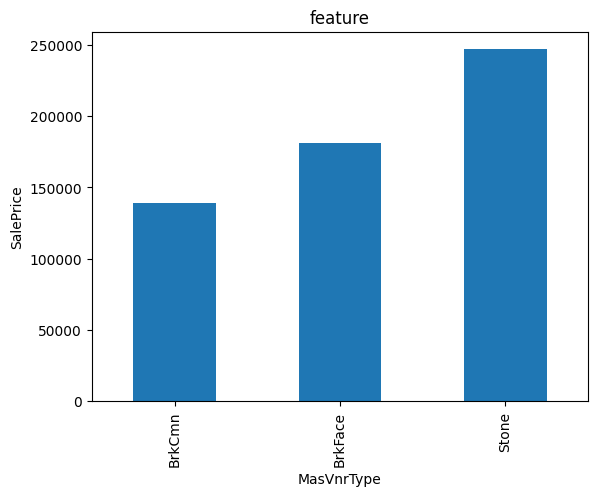

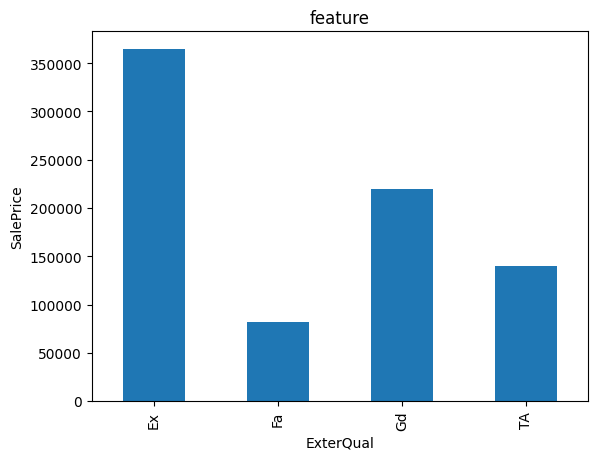

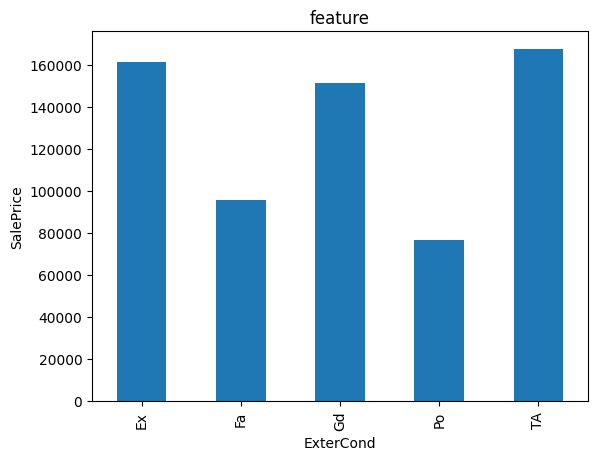

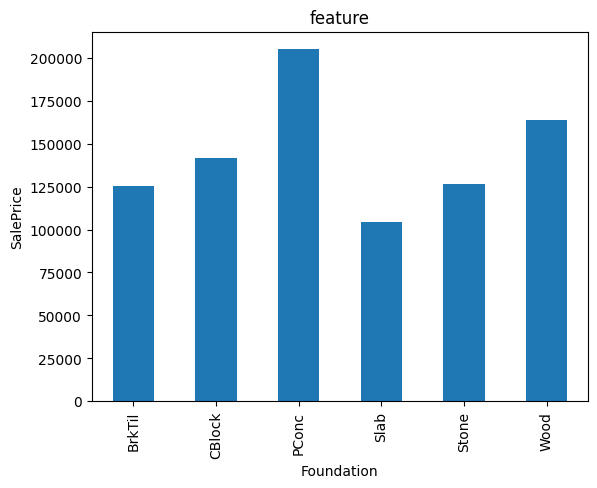

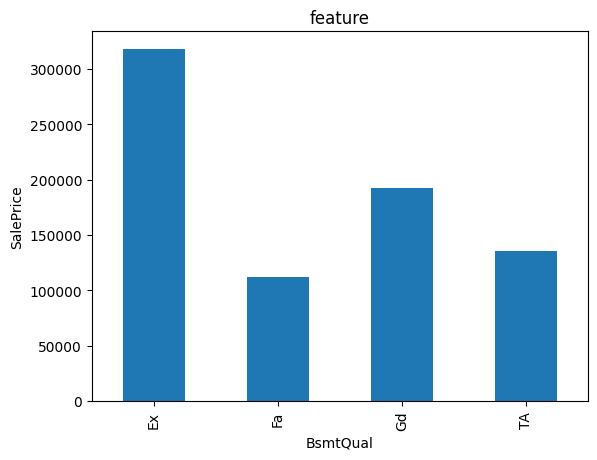

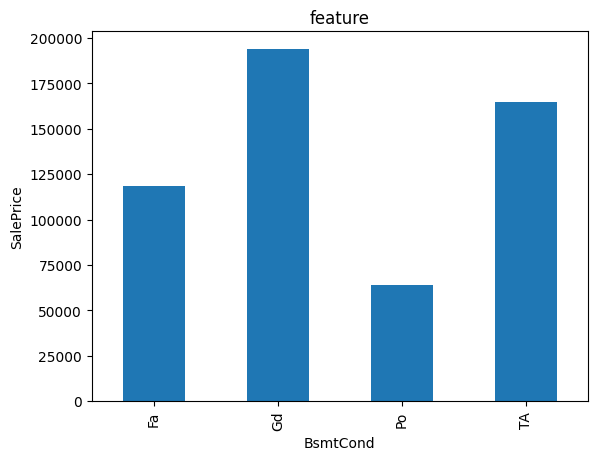

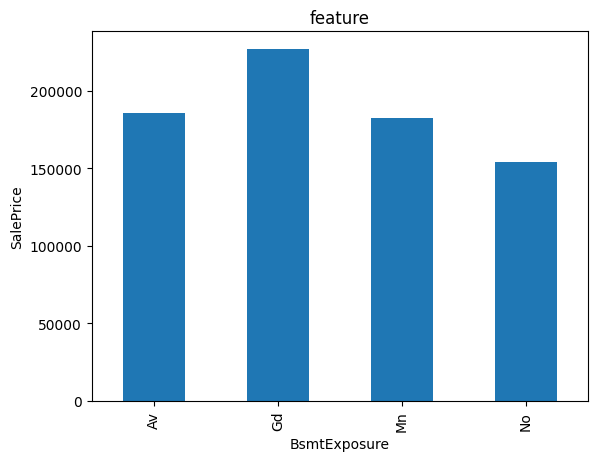

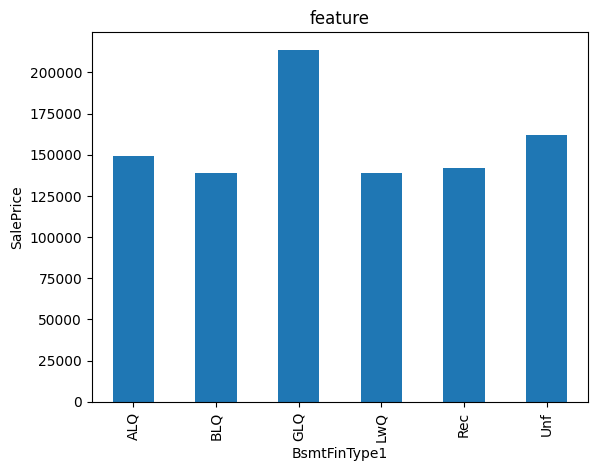

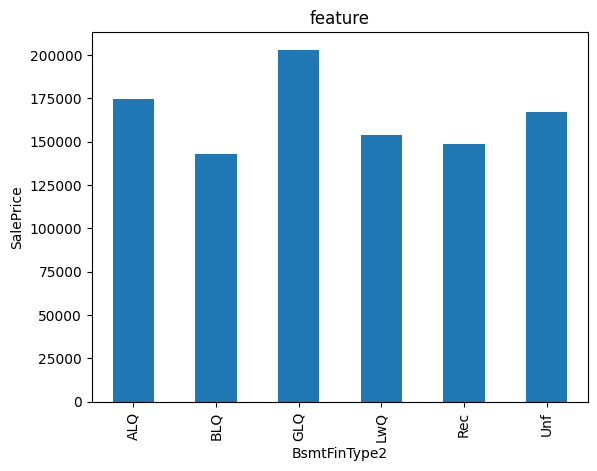

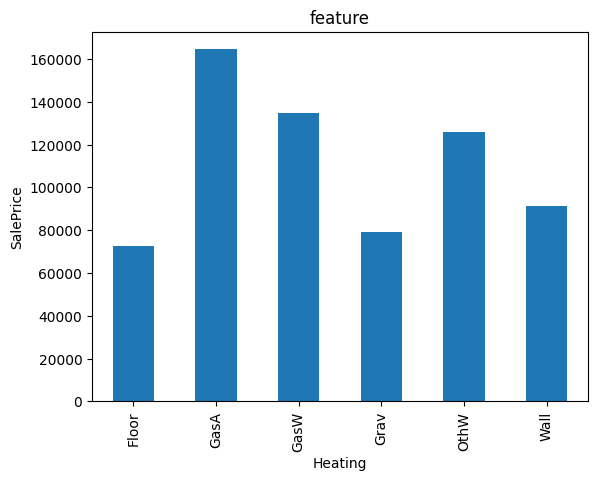

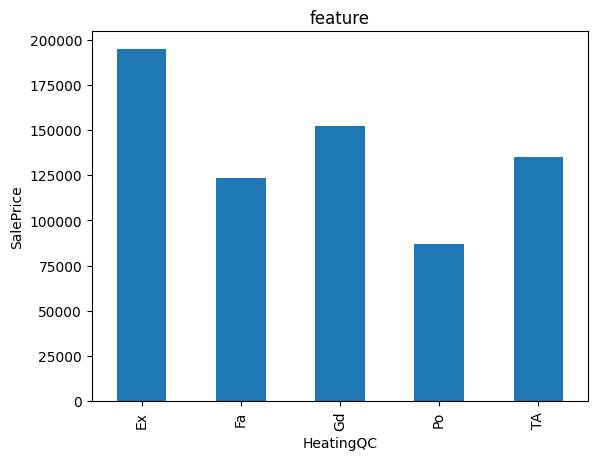

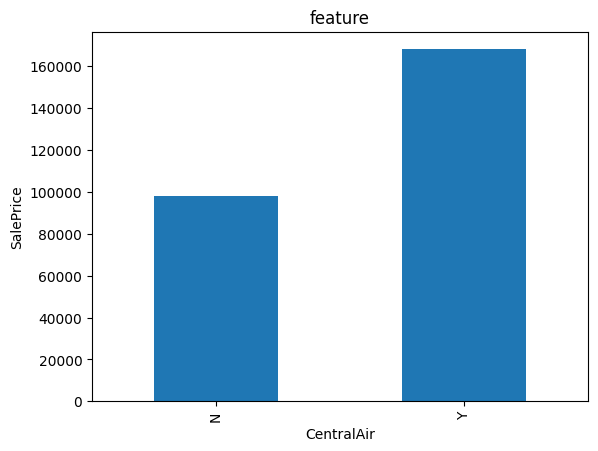

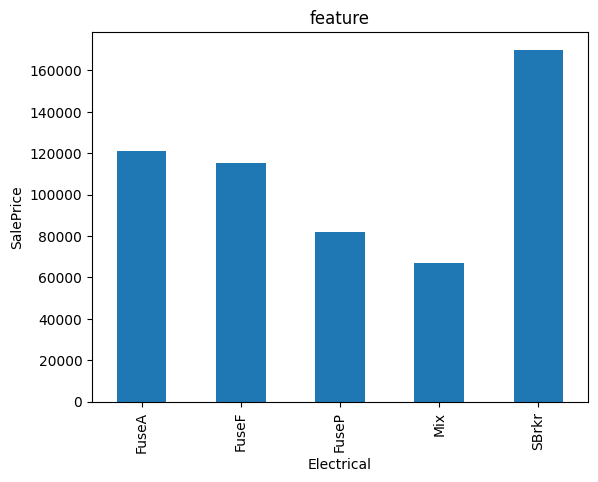

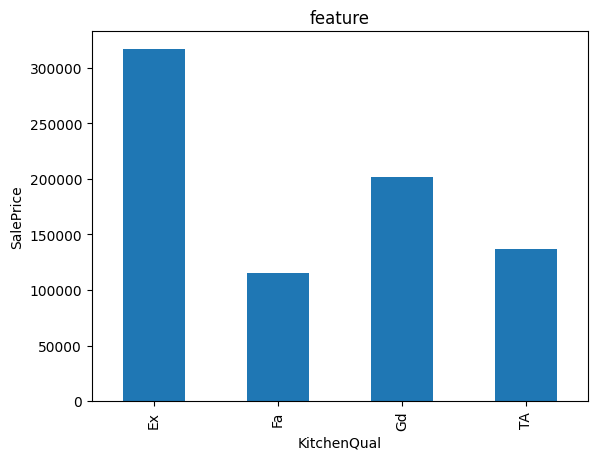

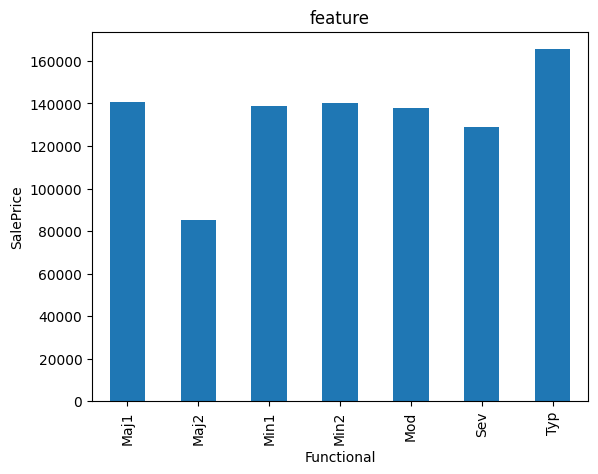

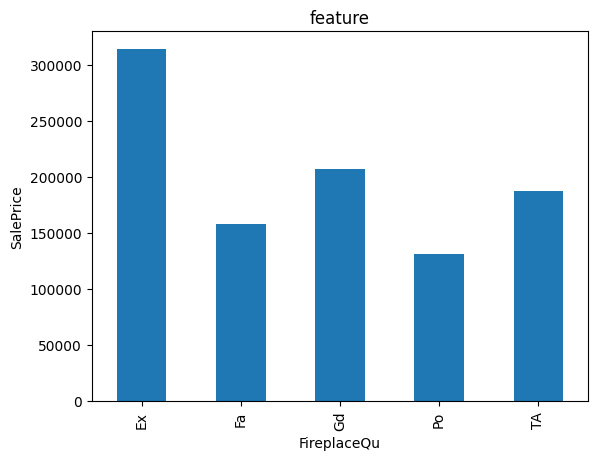

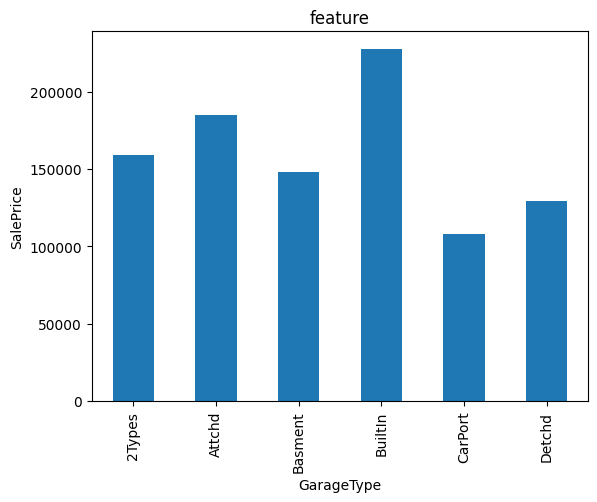

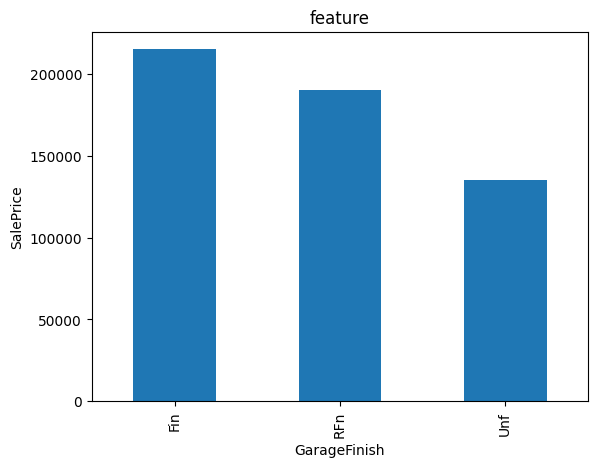

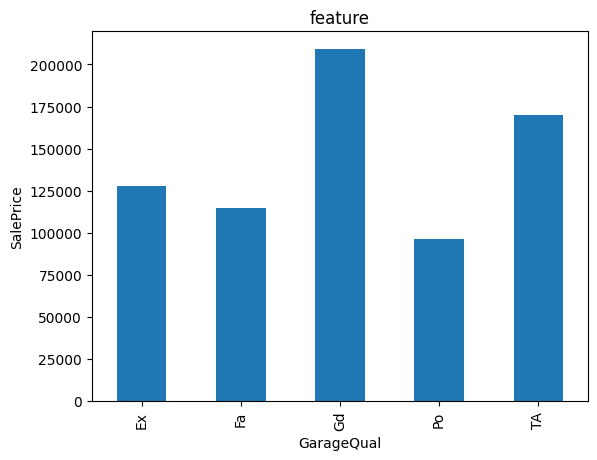

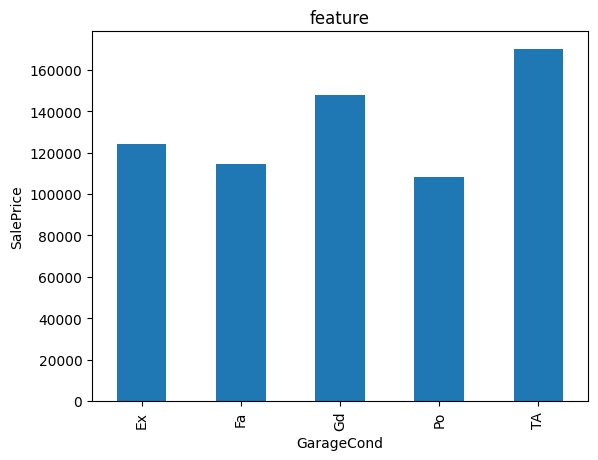

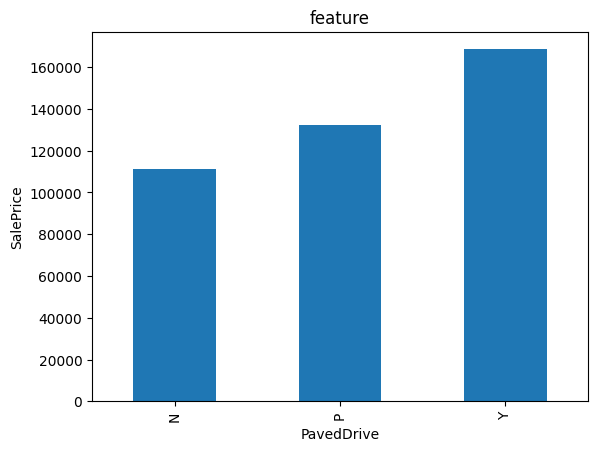

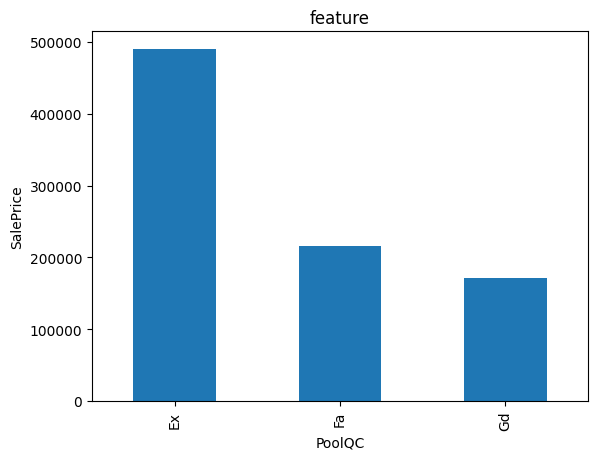

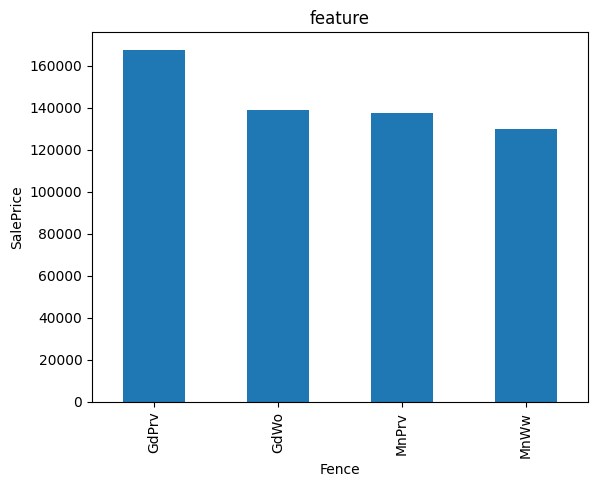

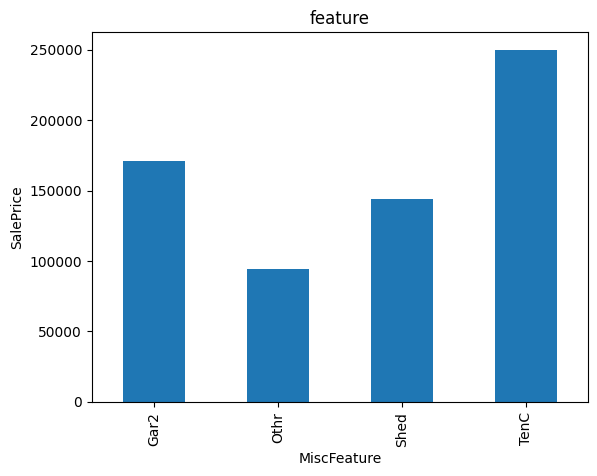

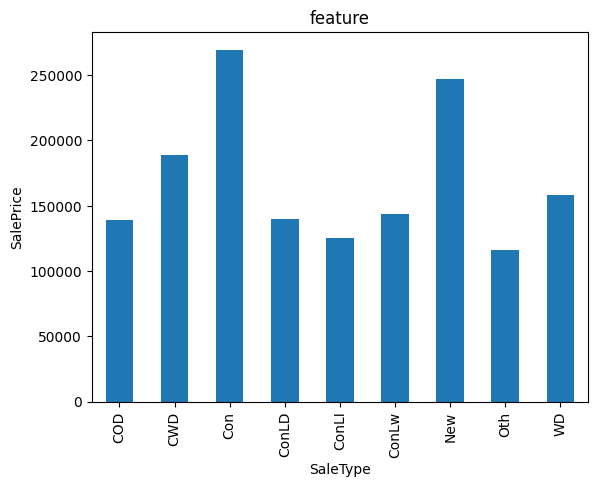

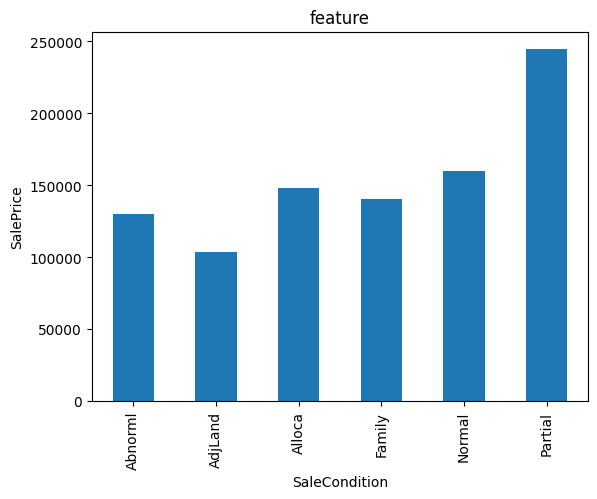

In [ ]:
for f in categorical_features:
  data=df1.copy()
  data.groupby(f)['SalePrice'].median().plot.bar()
  plt.ylabel('SalePrice')
  plt.xlabel(f)
  plt.title('feature')
  plt.show()

Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1,df1['SalePrice'],test_size=0.1,random_state=0)

Finding Null Values

In [ ]:
df1.isnull()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


Dropping Null Columns

In [ ]:
df2=df1.dropna(axis=1)

In [ ]:
df2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Finding Null Values in Categorical features

In [ ]:
categorical_nan=[feature for feature in df1.columns if df1[feature].isnull().sum()>1 and df1[feature].dtypes=='O']
for f in categorical_nan:
  print('{}:{} number of null values'.format(f,(df1[f].isnull().sum())))

Alley:1369 number of null values
MasVnrType:872 number of null values
BsmtQual:37 number of null values
BsmtCond:37 number of null values
BsmtExposure:38 number of null values
BsmtFinType1:37 number of null values
BsmtFinType2:38 number of null values
FireplaceQu:690 number of null values
GarageType:81 number of null values
GarageFinish:81 number of null values
GarageQual:81 number of null values
GarageCond:81 number of null values
PoolQC:1453 number of null values
Fence:1179 number of null values
MiscFeature:1406 number of null values


Handling NAN values of Categorical Features

In [ ]:
def replace_cat_feature(df1,categorical_nan):
    data=df1.copy()
    data[categorical_nan]=data[categorical_nan].fillna('Missing')
    return data

df1=replace_cat_feature(df1,categorical_nan)

df1[categorical_nan].isnull().sum()


Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [ ]:
df1[categorical_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

Numerical Variables that contain NAN values

In [ ]:
numerical_nan=[feature for feature in df1.columns if df1[feature].isnull().sum()>1 and df1[feature].dtypes!='O']
for f in numerical_nan:
  print('{}:{} number of null values'.format(f,df1[f].isnull().sum()))


LotFrontage:259 number of null values
MasVnrArea:8 number of null values
GarageYrBlt:81 number of null values



Replacing Null values with meadian of that particular feature

In [ ]:
x=df1['LotFrontage'].median()
print(x)
df1['LotFrontage'].fillna(x)

69.0


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
x=df1['MasVnrArea'].median()
print(x)
df1['MasVnrArea'].fillna(x)

0.0


0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [ ]:
x=df1['GarageYrBlt'].median()
print(x)
df1['GarageYrBlt'].fillna(x)

1980.0


0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [ ]:
for feature in numerical_nan:
    ## We will replace by using median since there are outliers
    df1[feature].fillna(df1[feature].median())
    print(df1[feature].median())
df1[numerical_nan].isnull().sum()

69.0
0.0
1980.0


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [ ]:
df1.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,1,2008,WD,Normal,118000


Temporal Variables(Date Time Variables

In [ ]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  df1[feature]=df1['YrSold']-df1[feature]

In [ ]:
df1[['YearBuilt','YearRemodAdd','GarageYrBlt']]

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0
...,...,...,...
1455,8,7,8.0
1456,32,22,32.0
1457,69,4,69.0
1458,60,14,60.0


Transforming Skewed numerical values using log normal distribution

In [ ]:
for feature in conti_feature:
  if 0 in df1[feature].unique():
    pass
  else:
    df1[feature]=np.log(df1[feature])

In [ ]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216


**Handling Rare Categorical Feature**


We will remove categorical variables that are present less than 1% of the observations

In [ ]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
for feature in categorical_features:
  temp=df1.groupby(feature)['SalePrice'].count()/len(df1)
  temp1=temp[temp>0.01].index
  df1[feature]=np.where(df1[feature].isin(temp1),df1[feature],'Rare_var')

In [ ]:
df1.head(50)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
0,1,60,4.174387,9.041922,7,5,5,5,196.0,706,...,False,False,False,False,True,False,False,True,False,False
1,2,20,4.382027,9.169518,6,8,31,31,0.0,978,...,False,False,False,False,True,False,False,True,False,False
2,3,60,4.219508,9.328123,7,5,7,6,162.0,486,...,False,False,False,False,True,False,False,True,False,False
3,4,70,4.094345,9.164296,7,5,91,36,0.0,216,...,False,False,False,False,True,True,False,False,False,False
4,5,60,4.430817,9.565214,8,5,8,8,350.0,655,...,False,False,False,False,True,False,False,True,False,False
5,6,50,4.442651,9.554993,5,5,16,14,0.0,732,...,True,False,False,False,True,False,False,True,False,False
6,7,20,4.317488,9.218705,8,5,3,2,186.0,1369,...,False,False,False,False,True,False,False,True,False,False
7,8,60,NaN,9.247829,7,6,36,36,240.0,859,...,True,False,False,False,True,False,False,True,False,False
8,9,50,3.931826,8.719317,7,5,77,58,0.0,0,...,False,False,False,False,True,True,False,False,False,False
9,10,190,3.912023,8.911934,5,6,69,58,0.0,851,...,False,False,False,False,True,False,False,True,False,False


**Feature Scaling**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df1' is your DataFrame and 'categorical_features' is a list of categorical columns

# Get the current columns in df1
current_categorical_features = [col for col in df1.columns if col in categorical_features]

# Convert categorical features to numerical using one-hot encoding
df1 = pd.get_dummies(df1, columns=current_categorical_features)

# Redefine feature_scale to include the new one-hot encoded columns
feature_scale=[feature for feature in df1.columns if feature not in ['Id','SalePrice']]

# Initialize and fit the scaler
scaler=MinMaxScaler()
scaler.fit(df1[feature_scale])
# Transform the data (note: this returns a NumPy array, not a DataFrame)
scaled_data = scaler.transform(df1[feature_scale])

# If you want to keep the transformed data in a DataFrame:
df1_scaled = pd.DataFrame(scaled_data, columns=feature_scale)
scaler.transform(df1[feature_scale])

array([[0.23529412, 0.41820812, 0.3663439 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.49506375, 0.39131677, ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 0.434909  , 0.4223585 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.42385922, 0.37959669, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.434909  , 0.39368765, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.47117546, 0.39806941, ..., 1.        , 0.        ,
        0.        ]])